# Project 2 : 
# DSI-MiSK-01: Classification

## Step 1: Load the data and perform basic operations.

In [235]:
# Import some necessary librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression

In [236]:
# load the train and test datasets in  pandas dataframe
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [237]:
# display the first five rows of the train dataset.
train_data.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


#### 1- Understand Problem and features:

In [238]:
# Number of observations in trainset
print('Observations Number in the Trainset: {}'.format(len(train_data)))

Observations Number in the Trainset: 2051


In [239]:
# number of features for each train and test set
print('Features Number in trainset: {}'.format(len(train_data.columns)))
print('Features Number in testset: {}'.format(len(test_data.columns)))


Features Number in trainset: 82
Features Number in testset: 80


In [240]:
# Features names:
train_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [241]:
# rename Columns by removing space to be accessible easier
train_data.columns = train_data.columns.str.replace(' ','_')
test_data.columns = test_data.columns.str.replace(' ','_')

#### 2- Univariable (Target) Study:

In [242]:
#Transform the Sale Condition feature so that 1=abnormal and 0=not abnormal
train_data['Sale_Condition'] = train_data['Sale_Condition'].apply(lambda x: 1 if x == 'Abnorml' else 0)

In [243]:
# Sale Condition
train_data['Sale_Condition'].describe()

count    2051.000000
mean        0.064359
std         0.245451
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Sale_Condition, dtype: float64

In [244]:
train_data['Sale_Condition'].value_counts()

0    1919
1     132
Name: Sale_Condition, dtype: int64

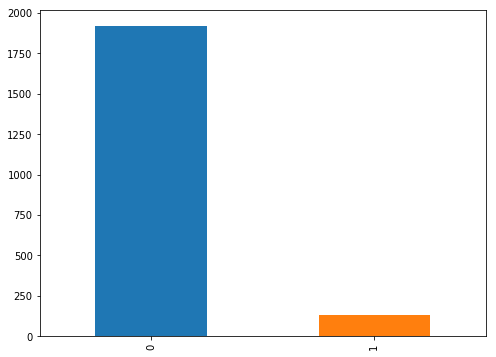

In [245]:
# Plot the Target distribution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
train_data['Sale_Condition'].value_counts().plot(kind='bar', ax=ax)

## Step 2: Cleaning and Manipulate the dataframe

### 1- Check Train set Outliers:

In [246]:
# Gr_Liv_Area
# Using plots above, we can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them.
train_data[train_data.Gr_Liv_Area >4000]

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,0,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,0,183850


In [247]:
# droping them 
train_data.drop(train_data[train_data.Gr_Liv_Area >4000].index,inplace=True)

In [248]:
# independent variables
# drop the  'Id' columns and target columns since it's unnecessary for  the prediction process.
train_features = train_data.drop(['Sale_Condition', 'SalePrice', 'Id', 'PID'],
                                 axis =1)
test_features = test_data.drop(['Id', 'PID'],
                               axis =1)

# dependent (target) variable for regression problem
y = train_data['Sale_Condition']

In [249]:
# Combine the two datasets (train , test) to fill the missing values and get dummies
# store indexes
ntrain = train_features.shape[0]
ntest = test_features.shape[0]

# full data
all_data = pd.concat((train_features, test_features)).reset_index(drop=True)

In [250]:
all_data.shape

(2928, 78)

### 2- Check Missing values:

In [251]:
# Get columns with missing values 
all_data.isnull().sum().sort_values(ascending=False).head(27)

Pool_QC           2916
Misc_Feature      2823
Alley             2730
Fence             2356
Fireplace_Qu      1422
Lot_Frontage       490
Garage_Yr_Blt      159
Garage_Qual        159
Garage_Cond        159
Garage_Finish      159
Garage_Type        157
Bsmt_Exposure       83
BsmtFin_Type_2      81
BsmtFin_Type_1      80
Bsmt_Cond           80
Bsmt_Qual           80
Mas_Vnr_Type        23
Mas_Vnr_Area        23
Bsmt_Half_Bath       2
Bsmt_Full_Bath       2
Garage_Cars          1
Bsmt_Unf_SF          1
Total_Bsmt_SF        1
BsmtFin_SF_2         1
Electrical           1
BsmtFin_SF_1         1
Garage_Area          1
dtype: int64

##### 1- Pool QC 

In [252]:
# check Pool QC is missing and Pool area is zero
all_data.loc[(all_data.Pool_QC.isnull()) & (all_data.Pool_Area ==0 ),'Pool_QC'].shape[0]

2916

In [253]:
# Data dictionary says NA means "No Pool"
all_data.loc[(all_data.Pool_QC.isnull()) & (all_data.Pool_Area == 0 ), 'Pool_QC'] = 'None'

##### 2- Misc_Feature

In [254]:
# check Misc_Feature is missing and Misc Value is zero
all_data.loc[(all_data.Misc_Feature.isnull()) & (all_data.Misc_Val == 0)].shape[0]

2823

In [255]:
# Data dictionary says NA means "no misc feature"
all_data.loc[(all_data.Misc_Feature.isnull()) & (all_data.Misc_Val == 0), 'Misc_Feature'] = 'None'

#### 3- Alley

In [256]:
all_data.loc[(all_data.Alley.isnull())].shape[0]

2730

In [257]:
# Data dictionary says NA means "no alley access"
all_data.loc[(all_data.Alley.isnull()), 'Alley'] = 'None'

#### 4- Fence

In [258]:
all_data.loc[(all_data.Fence.isnull())].shape[0]

2356

In [259]:
# Data dictionary says NA means "no fence"
all_data.loc[(all_data.Fence.isnull()), 'Fence'] = 'None'

#### 5- Fireplace_Qu

In [260]:
# check Fireplace_Qu is missing and Fireplaces is zero
all_data.loc[(all_data.Fireplace_Qu.isnull()) & (all_data.Fireplaces == 0)].shape[0]

1422

In [261]:
# Data dictionary says NA means "no fireplace"
all_data.loc[(all_data.Fireplace_Qu.isnull()) & (all_data.Fireplaces == 0), 'Fireplace_Qu'] = 'None'

#### 6- Lot_Frontage

In [262]:
# check Lot_Frontage is missing and Lot_Area is bigger than zero
all_data.loc[(all_data.Lot_Frontage.isnull()) & (all_data.Lot_Area > 0)].shape[0]

490

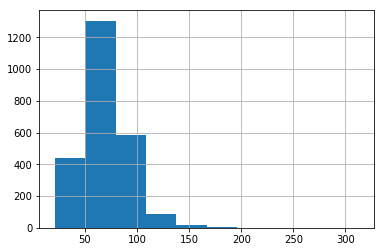

In [263]:
# so we have Lot area for missing Lot_Frontage , need to fill them with median or mean

# Check the distubition
all_data.Lot_Frontage.hist() # shewed right

In [264]:
# since it's right skewed, we can fill in missing values by the median LotFrontage of the neighborhood.
all_data['Lot_Frontage'] = all_data.groupby('Neighborhood')['Lot_Frontage'].fillna(0).transform(lambda x: x.fillna(np.median(x)))

#### 7- Garage Columns

In [265]:
garage_cols = ['Garage_Finish', 'Garage_Cond', 'Garage_Qual',
               'Garage_Yr_Blt', 'Garage_Type', 'Garage_Area',
               'Garage_Cars']

In [266]:
all_data.loc[all_data[garage_cols].isnull().apply(lambda x: any(x), axis=1),garage_cols]

,Garage_Finish,Garage_Cond,Garage_Qual,Garage_Yr_Blt,Garage_Type,Garage_Area,Garage_Cars
28,NaN,NaN,NaN,NaN,NaN,0.0,0.0
53,NaN,NaN,NaN,NaN,NaN,0.0,0.0
65,NaN,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,NaN,0.0,0.0
101,NaN,NaN,NaN,NaN,NaN,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0,0.0
120,NaN,NaN,NaN,NaN,NaN,0.0,0.0
134,NaN,NaN,NaN,NaN,NaN,0.0,0.0
136,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [267]:
# Check Garage with total area >0
garage_index = all_data.loc[(all_data[garage_cols].isnull().apply(lambda x: any(x) , axis=1)) & \
                   (all_data.Garage_Area > 0), \
                   garage_cols].index
all_data.loc[garage_index, garage_cols]

,Garage_Finish,Garage_Cond,Garage_Qual,Garage_Yr_Blt,Garage_Type,Garage_Area,Garage_Cars
2814,NaN,NaN,NaN,NaN,Detchd,360.0,1.0


In [268]:
# Fill in missing values (with total garage area >0) with mode value or mean group by 'Neighborhood'
for col in garage_cols:
    if all_data.dtypes[col] == "object":
        all_data.loc[garage_index,col] = all_data.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.mode()[0]))
    else:
        all_data.loc[garage_index,col] = all_data.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.mean()))

In [269]:
def fill_missing_data(df, col_lst):
    '''
    Function to fill in missing data based on column data type
        *args:
            df: dataframe
            col_lst: list of columns which need to check thier missing values
    '''
    for col in col_lst:
        if df.dtypes[col] == "object":
            df[col] = df[col].fillna('None')
        else:
            df[col] = df[col].fillna(0)

In [270]:
# Fill in remaining rows
fill_missing_data(all_data, garage_cols)

#### 8- Basment Columns

In [271]:
bsmt_cols = ['Bsmt_Cond', 'Bsmt_Qual', 'Bsmt_Exposure',
               'BsmtFin_Type_2', 'BsmtFin_Type_1', 'BsmtFin_SF_1',
               'BsmtFin_SF_2', 'Bsmt_Half_Bath', 'Bsmt_Full_Bath',
               'Total_Bsmt_SF', 'Bsmt_Unf_SF']

In [272]:
all_data.loc[all_data[bsmt_cols].isnull().apply(lambda x: any(x) , axis=1),bsmt_cols]

,Bsmt_Cond,Bsmt_Qual,Bsmt_Exposure,BsmtFin_Type_2,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Half_Bath,Bsmt_Full_Bath,Total_Bsmt_SF,Bsmt_Unf_SF
12,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
# bsmt with total bsmt area >0
bsmt_index = all_data.loc[(all_data[bsmt_cols].isnull().apply(lambda x: any(x) , axis=1)) & \
                   (all_data.Total_Bsmt_SF > 0), \
                   bsmt_cols].index
all_data.loc[bsmt_index,bsmt_cols]

,Bsmt_Cond,Bsmt_Qual,Bsmt_Exposure,BsmtFin_Type_2,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Half_Bath,Bsmt_Full_Bath,Total_Bsmt_SF,Bsmt_Unf_SF
1146,TA,Gd,No,NaN,GLQ,1124.0,479.0,0.0,1.0,3206.0,1603.0
1455,TA,Gd,NaN,Unf,Unf,0.0,0.0,0.0,0.0,725.0,725.0
1546,TA,Gd,NaN,Unf,Unf,0.0,0.0,0.0,0.0,1595.0,1595.0
1995,TA,Gd,NaN,Unf,Unf,0.0,0.0,0.0,0.0,936.0,936.0


In [274]:
# Fill in missing values (with total bsmt area >0) with mode value or mean group by 'Neighborhood'
for col in bsmt_cols:
    if all_data.dtypes[col] == "object":
        all_data.loc[bsmt_index,col] = all_data.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.mode()[0]))
    else:
        all_data.loc[bsmt_index,col] = all_data.groupby('Neighborhood')[col].transform(lambda x: x.fillna(x.mean()))

In [275]:
# Fill in remaining rows
fill_missing_data(all_data, bsmt_cols)

#### 9 - Mas_Vnr_Type , Mas_Vnr_Area

In [276]:
mas_cols = ['Mas_Vnr_Type', 'Mas_Vnr_Area']
all_data.loc[(all_data[mas_cols].isnull().apply(lambda x: any(x) , axis=1)), mas_cols]

,Mas_Vnr_Type,Mas_Vnr_Area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


In [277]:
# Fill in remaining rows
fill_missing_data(all_data, mas_cols)

#### 10 - Electrical

In [278]:
all_data.loc[all_data.Electrical.isnull()]

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type
2684,80,RL,73.0,9735,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,0,None,None,None,0,5,2008,WD


In [279]:
# fill with mode
all_data['Electrical'] = all_data.Electrical.fillna(all_data.Electrical.mode()[0])

### 3- Features Engineering:

- Change type of some numerical feaures that are really categorical

In [280]:
all_data['MS_SubClass'] = all_data['MS_SubClass'].apply(str)
all_data['Overall_Cond'] = all_data['Overall_Cond'].astype(str)
all_data['Overall_Qual'] = all_data['Overall_Qual'].astype(str)
all_data['Yr_Sold'] = all_data['Yr_Sold'].astype(str)
all_data['Mo_Sold'] = all_data['Mo_Sold'].astype(str)

- Encode some categorical features as ordered numbers when there is information in the order, Then change their classes range to be small and clear 

In [281]:
cols_1 = ('Fireplace_Qu', 'Bsmt_Qual', 'Bsmt_Cond', 'Garage_Qual', 'Garage_Cond' ,'Garage_Finish', 'Street',
        'Exter_Qual', 'Exter_Cond','Heating_QC', 'Pool_QC', 'Kitchen_Qual', 'BsmtFin_Type_1','Fence', 
        'BsmtFin_Type_2',  'Land_Slope','Lot_Shape', 'Paved_Drive', 'Alley', 'Overall_Cond','Overall_Qual')
cols_2 = ('Functional', 'Central_Air', 'Bsmt_Exposure')

In [282]:
for c in cols_1:
    all_data[c] = all_data[c].replace( {"None":0,"No" : 0,"N" : 0,
                                      "Po" : 1,"Grvl" : 1, "Unf" : 1,"MnWw":1, "P" : 1,"Sev" : 1,"IR3" : 1,
                                      "Fa" : 2,"RFn":2,"Pave" : 2,"LwQ": 2,"GdWo":2, "Y" : 2,"Mod" : 2,"IR2" : 2,
                                      "TA": 3, "Fin":3,"Rec" : 3,"MnPrv":3, "Gtl" : 3, "IR1" : 3,
                                      "Gd" : 4,"BLQ" : 4,"GdPrv":4 , "Reg" : 4,
                                      "Ex" : 5 ,"ALQ" : 5, "GLQ" : 6 })

for c in cols_2:
    all_data[c] = all_data[c].replace( {"No" : 0,"N" : 0,"None" : 0,
                                       "Sal" : 1,"Mn" : 1, "Y" : 1,
                                      "Sev" : 2, "Av": 2,
                                      "Maj2" : 3,"Gd" : 3, 
                                       "Maj1" : 4,
                                       "Mod": 5,
                                      "Min2" : 6,
                                      "Min1" : 7,
                                      "Typ" : 8})  

In [283]:
# Resize columns range 
cols_map1 = ('Overall_Qual','Overall_Cond')
for c in cols_map1:
    all_data[c] = all_data[c].replace({1 : 1, 2 : 1, 3 : 1, # bad
                                       4 : 2, 5 : 2, 6 : 2, # average
                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                       })

    
cols_map2 = ('Garage_Finish','Paved_Drive')
for c in cols_map2:
    all_data[c] = all_data[c].replace({0 : 1, 1 : 1, # bad
                                       2 : 2, 3 : 2 # good
                                       })
    
    
cols_map3 = ('Garage_Cond','Garage_Qual','Fireplace_Qu','Kitchen_Qual','Heating_QC',
             'Bsmt_Cond','Bsmt_Qual','Exter_Cond','Exter_Qual')
for c in cols_map3:
    all_data[c] = all_data[c].replace({1 : 1, # bad
                                       2 : 1, 3 : 1, # average
                                       4 : 2, 5 : 2 # good
                                       })
    
    
cols_map4 = ('BsmtFin_Type_1','BsmtFin_Type_2')
for c in cols_map4:
    all_data[c] = all_data[c].replace({1 : 1, # unfinished
                                       2 : 1, 3 : 1, # rec room
                                       4 : 2, 5 : 2, 6 : 2 # living quarters
                                        })
    
    
cols_map5 = ('Fence','Bsmt_Exposure')
for c in cols_map5:
    all_data[c] = all_data[c].replace({0 : 1,# bad
                                       1 : 1, 2:1, # avarge
                                       3:2 ,4: 2 # good
                                       })
    
    
all_data['Pool_QC'] = all_data['Pool_QC'].replace({1 : 1, 2 : 1, # average
                                                 3 : 2, 4 : 2 # good
                                                 })  


all_data['Functional'] = all_data['Functional'].replace({1 : 1, 2 : 1, # bad
                                       3 : 2, 4 : 2, # major
                                       5 : 3, 6 : 3, 7 : 3, # minor
                                       8 : 4 # typical
                                       })


all_data['Lot_Shape'] = all_data['Lot_Shape'].replace({1 : 1, 2 : 1, 3:1, # bad
                                       4: 2 # good
                                       })

- Getting dummy categorical features

In [284]:
#dummies
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2928, 272)


- Getting the new train and test sets.

In [285]:
# features
train_features = all_data[:ntrain]
test_features = all_data[ntrain:]

# Standrized features 
ss = StandardScaler()
all_data_ss = ss.fit_transform(all_data)
train_features_ss = all_data_ss[:ntrain]
test_features_ss = all_data_ss[ntrain:]

## Step 3: Modeling:

### 1- KNN Regression Model

In [286]:
# Graidsearch knn regression
#========
knn_parameters = {
    'n_neighbors':[1, 3, 5, 7, 9, 21, 25],
    'weights':['uniform', 'distance']}

knn_grid_search = GridSearchCV(KNeighborsClassifier(),
                               knn_parameters,
                               cv=5,
                               verbose=1 )

results = knn_grid_search.fit(train_features_ss, y)
results.best_params_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:  1.4min finished


{'n_neighbors': 7, 'weights': 'uniform'}

In [234]:
# KNN regression
#====== 
knn_model = KNeighborsClassifier(n_neighbors=7,
                                 weights='distance')

knn_model = knn_model.fit(train_features_ss, y)

# make prediction on train set
y_pred_train_knn = knn_model.predict(train_features_ss)
print("Model score on training set: ",
      knn_model.score( train_features_ss, y, y_pred_train_knn))


# make prediction on test set
y_pred_knn = knn_model.predict(test_features_ss)

#Get Execl Sheet
pred = pd.DataFrame({'Id': test_data['Id'], 'Sale Condition': y_pred_knn})
pred.to_csv('HousePrices_C_1.csv', header=True, index=False)

Model score on training set:  0.9355783308931186


### 2- Logistic Regression Model

In [177]:
# Graidsearch Logistic regression
#========
log_parameters = {
    'penalty':['l1', 'l2'],
    'solver': ['liblinear'],
    'C': np.logspace(-5, 0, 50)
}

log_gridsearch = GridSearchCV(LogisticRegression(), log_parameters, cv=5, verbose=1 )
results = log_gridsearch.fit(train_features_ss, y)
results.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   25.8s finished


{'C': 0.037275937203149416, 'penalty': 'l1', 'solver': 'liblinear'}

In [178]:
# Logistic regression
#====== 
log_model = LogisticRegression(C=0.037275937203149416,
                               penalty='l1',
                               solver='liblinear')

log_model = log_model.fit(train_features_ss, y)

# make prediction on train set
y_pred_train_log = log_model.predict(train_features_ss)
print("Model score on training set: ",
      log_model.score( train_features_ss, y))


# make prediction on test set
y_pred_log = log_model.predict(test_features_ss)

#Get Execl Sheet
pred = pd.DataFrame({'Id': test_data['Id'], 'Sale Condition': y_pred_log})
pred.to_csv('HousePrices_C_2.csv', header=True, index=False)

Model score on training set:  0.9385065885797951


#### Model with the Highest accuracy is Knn Model